In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import datetime as dt
from datetime import datetime
from datetime import date
import calendar

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [110]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12975,2012-06-29 20:00:00,3,0,1,1,37.72,44.695,42.0,16.9979,53,255,308
12976,2012-06-29 21:00:00,3,0,1,2,35.26,41.665,53.0,12.9980,41,195,236
12977,2012-06-29 22:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,34,129,163
12978,2012-06-29 23:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,6,42,48


In [34]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

# Univariate Analysis

In [35]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,0.027504,0.685978,1.426656,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,1.053046,0.163553,0.464143,0.647955,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


In [40]:
count_percent=train['count'].value_counts()/len(train['count'].value_counts())

/Users/sahil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

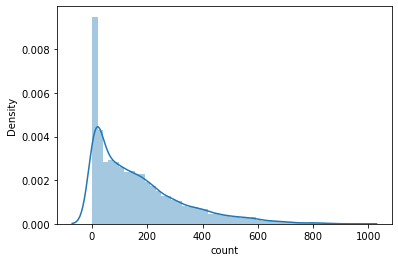

In [45]:
sn.distplot(train['count'])

<AxesSubplot:xlabel='count', ylabel='Density'>

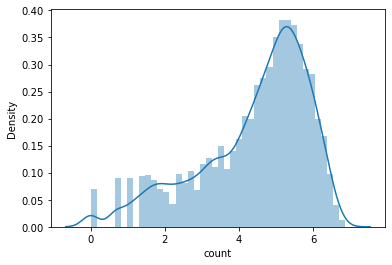

In [51]:
sn.distplot(np.log(train['count']))

/Users/sahil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='registered', ylabel='Density'>

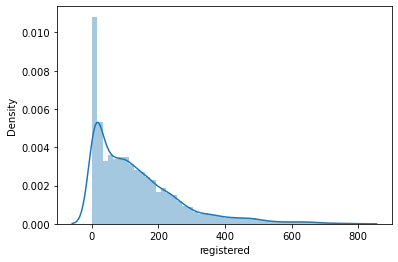

In [55]:
sn.distplot(train['registered'])

# Bivariate analysis

<AxesSubplot:xlabel='registered', ylabel='count'>

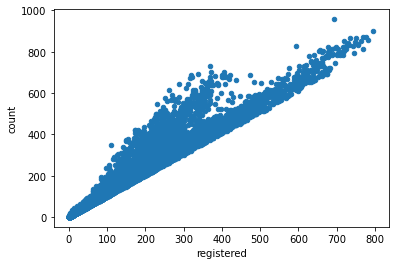

In [65]:
train.plot.scatter('registered','count')

In [62]:
correlation_coeff=train['count'].corr(train['registered'])

In [60]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,-0.010959,0.014343,-0.013005,0.394560,0.397765,0.181712,-0.135762,0.104657,0.085699,0.100687
holiday,-0.010959,1.000000,-0.248558,-0.018406,-0.025104,-0.032903,-0.029520,0.021646,0.029135,-0.046053,-0.029340
workingday,0.014343,-0.248558,1.000000,0.052788,0.060589,0.064840,0.028026,0.001986,-0.307930,0.131819,0.018842
weather,-0.013005,-0.018406,0.052788,1.000000,-0.093655,-0.094877,0.432497,0.011120,-0.161752,-0.139034,-0.161018
temp,0.394560,-0.025104,0.060589,-0.093655,1.000000,0.991839,-0.048478,-0.008669,0.459414,0.344451,0.415938
atemp,0.397765,-0.032903,0.064840,-0.094877,0.991839,1.000000,-0.031606,-0.049997,0.454015,0.342345,0.412644
humidity,0.181712,-0.029520,0.028026,0.432497,-0.048478,-0.031606,1.000000,-0.296975,-0.320253,-0.279501,-0.322269
windspeed,-0.135762,0.021646,0.001986,0.011120,-0.008669,-0.049997,-0.296975,1.000000,0.079524,0.100579,0.105607
casual,0.104657,0.029135,-0.307930,-0.161752,0.459414,0.454015,-0.320253,0.079524,1.000000,0.509175,0.707938
registered,0.085699,-0.046053,0.131819,-0.139034,0.344451,0.342345,-0.279501,0.100579,0.509175,1.000000,0.968329


<AxesSubplot:xlabel='casual', ylabel='count'>

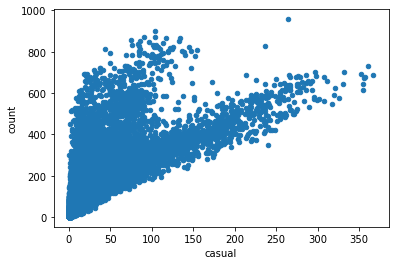

In [64]:
train.plot.scatter('casual','count')

In [66]:
train['casual'].corr(train['count'])

0.707938337087219

In [67]:
train['temp'].corr(train['count'])

0.415938359771636

<AxesSubplot:xlabel='temp', ylabel='count'>

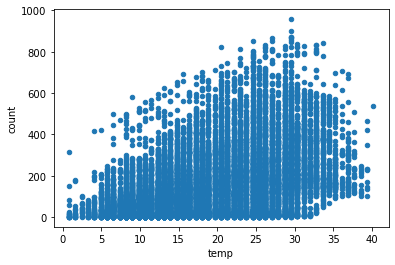

In [69]:
train.plot.scatter('temp','count')

In [70]:
train['atemp'].corr(train['count'])

0.4126443378125083

<AxesSubplot:xlabel='atemp', ylabel='count'>

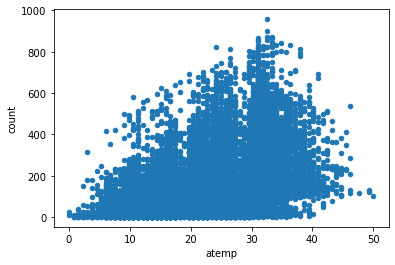

In [71]:
train.plot.scatter('atemp','count')

In [77]:
train.groupby('season')['count'].mean()

season
1    113.251256
2    208.344069
3    195.235653
4    152.828960
Name: count, dtype: float64

<AxesSubplot:xlabel='season'>

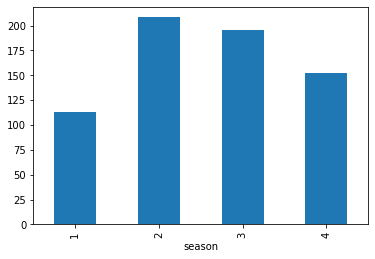

In [85]:
train.groupby('season')['count'].mean().plot.bar()

In [87]:
train.groupby('weather')['count'].mean()

weather
1    183.211870
2    152.073022
3     93.951241
4     74.333333
Name: count, dtype: float64

<AxesSubplot:xlabel='weather'>

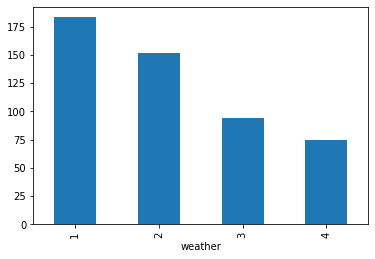

In [88]:
train.groupby('weather')['count'].mean().plot.bar()

In [93]:
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()

In [95]:
mask=np.array(corr)

<AxesSubplot:>

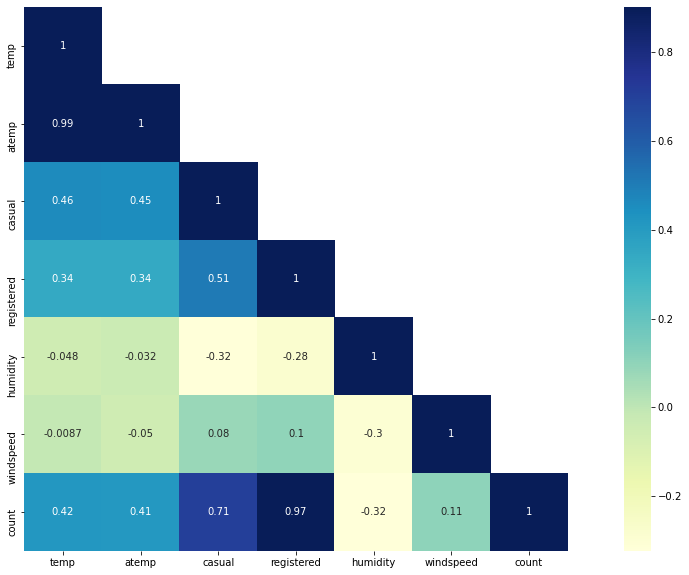

In [98]:
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr,mask=mask,vmax=.9,square=True,annot=True,cmap="YlGnBu")

# Missing values search

In [102]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [103]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

In [151]:
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [152]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16,2011-01-01,0,1
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40,2011-01-01,1,1
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32,2011-01-01,2,1
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13,2011-01-01,3,1
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1,2011-01-01,4,1


In [154]:
test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

# Predictive Modelling- Linear Regression

In [157]:
from sklearn.linear_model import LinearRegression

In [161]:
training = train[train['datetime']<='2012-03-30 0:00:00']
validation = train[train['datetime']>'2012-03-30 0:00:00']

In [162]:
train = train.drop(['datetime','date', 'atemp'],axis=1)
test = test.drop(['datetime','date', 'atemp'], axis=1)
training = training.drop(['datetime','date', 'atemp'],axis=1)
validation = validation.drop(['datetime','date', 'atemp'],axis=1)

In [163]:
x_train=training.drop('count',axis=1)
y_train=np.log(training['count'])
x_validation=validation.drop(['count'],axis=1)
y_validation=np.log(validation['count'])

In [164]:
lreg=LinearRegression()

In [165]:
lreg.fit(x_train,y_train)

LinearRegression()

In [166]:
lreg.score(x_train,y_train)

0.7332467436684664

In [167]:
lreg.score(x_validation,y_validation)

0.6079782061541915

In [187]:
x_train.shape, y_train.shape, x_validation.shape, y_validation.shape

((10774, 11), (10774,), (2206, 11), (2206,))

In [188]:
pred=lreg.predict(x_validation)

In [189]:
def rmsle(y,y1):
    y=np.exp(y),
    y1=np.exp(y1)
    log1=np.nan_to_num(np.array([np.log(v+1) for v in y]))
    log2=np.nan_to_num(np.array([np.log(v+1) for v in y1]))
    add=(log1-log2)**2
    final= np.sqrt(np.mean(add))
    return final

In [190]:
rmsle(y_validation,pred)

0.8875379204281808

In [191]:
#The rmsle value is quite high, regression model is not suitable.

# Decision Tree Model

In [192]:
from sklearn.tree import DecisionTreeRegressor

In [193]:
dt_reg=DecisionTreeRegressor(max_depth=6)

In [194]:
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6)

In [195]:
pred1=dt_reg.predict(x_validation)

In [196]:
rmsle(y_validation,pred1)

0.1187907637616883

In [197]:
#Here, rmsle value is lower and this model is more suitable 

In [200]:
pred_test=dt_reg.predict(test)

In [201]:
pred_final=np.exp(pred_test)

In [202]:
pred_final

array([62.50342328, 62.50342328, 20.2367013 , ..., 87.8494557 ,
       56.39585306, 56.39585306])

In [203]:
assignment=pd.DataFrame()

In [204]:
assignment['count']=pred_final

In [207]:
assignment.to_csv('submission_csv',header=True, index=False)